# Разведочный анализ данных. Исследование и визуализация данных.

## Задание:
    Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
    Для первой лабораторной работы рекомендуется использовать датасет без пропусков в данных, например из Scikit-learn.
    Пример преобразования датасетов Scikit-learn в Pandas Dataframe можно посмотреть здесь.
    Для лабораторных работ не рекомендуется выбирать датасеты большого размера.

Создать ноутбук, который содержит следующие разделы:

    Текстовое описание выбранного Вами набора данных.
    Основные характеристики датасета.
    Визуальное исследование датасета.
    Информация о корреляции признаков.
    Сформировать отчет и разместить его в своем репозитории на github.

## 1) Текстовое описание набора данных
В качестве набора данных будем исползовать датасет пациентов с диабетом - https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

- age - возраст в годах
- sex - пол - Целевой признак (1 или 2)
- bmi (body mass index) - индекс массы тела (ИМТ)
- bp (avereage blood presure)- среднее кровяное давление
- tc (total serum cholesterol) - общий холестерин в сыворотке крови
- ldl (low-density lipoproteins) - ЛПНП, липопротеин низкой плотности
- hdl (high-density lipoproteins) - ЛПВП, липопротеин высокой плотности
- tch (total cholesterol / HDL) - общий холестерин / ЛПВП
- ltg (possibly log of serum triglycerides level) - возможный логарифм уровня триглицеридов в сыворотке крови
- glu (blood sugar level) - уровень сахара в крови

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных

In [2]:
data_url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
data = pd.read_csv(data_url, sep="\s+")    
data = pd.DataFrame(data={'AGE':data['AGE'],'SEX':data['SEX'],'BMI':data['BMI'],'BP':data['BP'],'TC':data['S1'],'LDL':data['S2'],'HDL':data['S3'],'TCH':data['S4'],'LTG':data['S5'],'GLU':data['S6'],'Y':data['Y']})
#data.pop('Y')

## 2) Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

AGE  SEX   BMI     BP   TC    LDL   HDL  TCH     LTG  GLU    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598   87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918   69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728   85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903   89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905   80  135

In [4]:
# Размер датасета
print('Всего строк: {} \nВсего столбцов: {}'.format(data.shape[0],data.shape[1]))

Всего строк: 442 
Всего столбцов: 11


In [5]:
# Список колонок с типами данных
data.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
TC       int64
LDL    float64
HDL    float64
TCH    float64
LTG    float64
GLU      int64
Y        int64
dtype: object

In [6]:
# Проверим наличие пустых значений - пустых значений нет
data.isnull().sum()

AGE    0
SEX    0
BMI    0
BP     0
TC     0
LDL    0
HDL    0
TCH    0
LTG    0
GLU    0
Y      0
dtype: int64

In [7]:
# Основные характеристики набора данных
data.describe()

AGE         SEX         BMI          BP          TC         LDL  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

              HDL         TCH         LTG         GLU           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000

In [8]:
# Определим уникальные значения для целевого признака
data['SEX'].unique()

array([2, 1], dtype=int64)

## 3) Визуальное исследование датасета

### Диаграмма рассеяния

<AxesSubplot:xlabel='BMI', ylabel='HDL'>

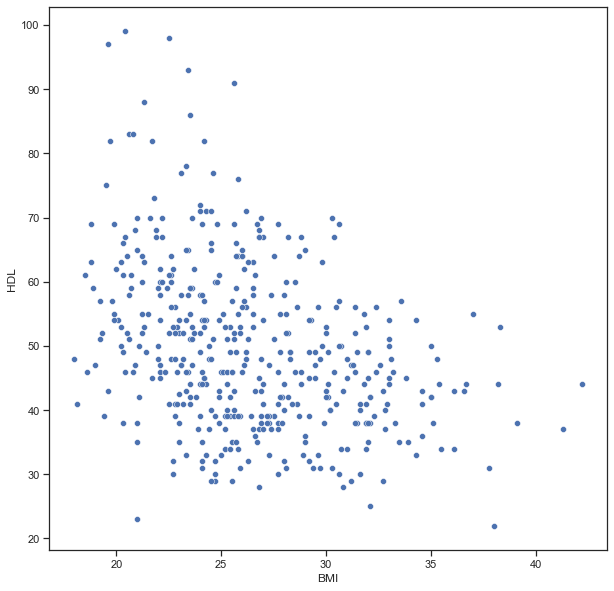

In [9]:
# Зависимость HDL (high-density lipoproteins) - ЛПВП, липопротеин высокой плотности
# BMI (body mass index) - индекс массы тела (ИМТ)
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x = 'BMI', y = 'HDL', data = data)

<AxesSubplot:xlabel='BMI', ylabel='HDL'>

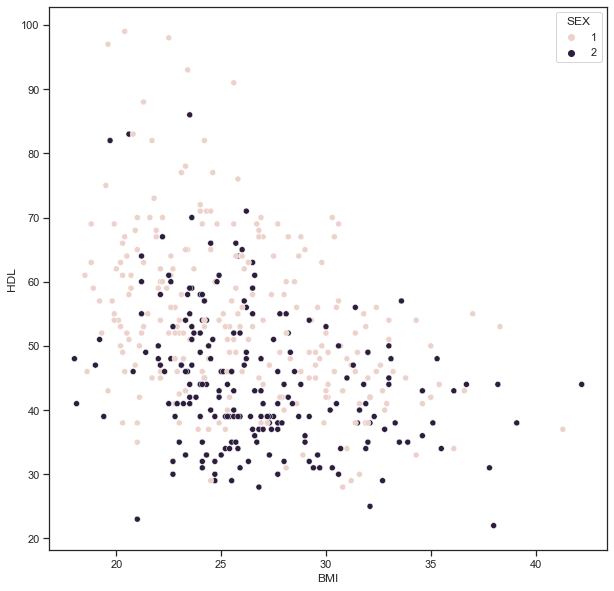

In [10]:
# Зависимость HDL (high-density lipoproteins) - ЛПВП, липопротеин высокой плотности
# BMI (body mass index) - индекс массы тела (ИМТ) по целевому признаку
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x = 'BMI', y = 'HDL', data = data, hue='SEX')

Как видно из диаграммы выше, проявляется очень слабое распредление по гиперболе. 


<AxesSubplot:xlabel='TC', ylabel='LDL'>

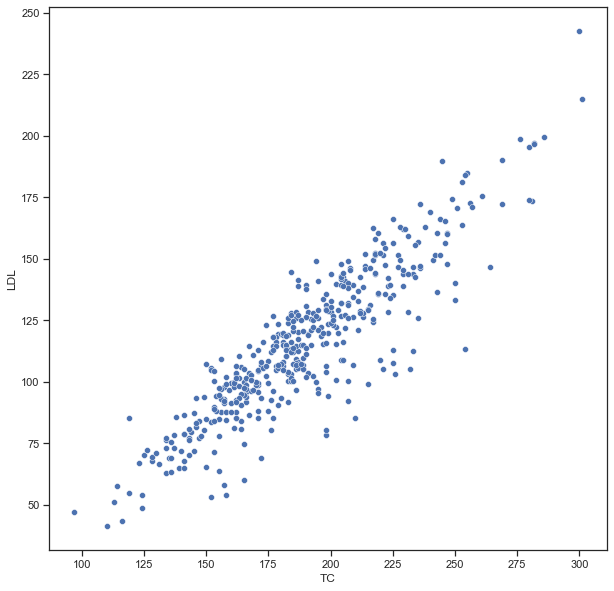

In [11]:
# Зависимость TC (total serum cholesterol) - общий холестерин в сыворотке крови - от
# LDL (low-density lipoproteins) - ЛПНП, липопротеин низкой плотности
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x = 'TC', y = 'LDL', data = data)

В этом примере зависимость имеет линейный характер

## Гистограммы

Оценим плотность вероятности распределения данных на примере возраста пациентов.

D:\Programs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

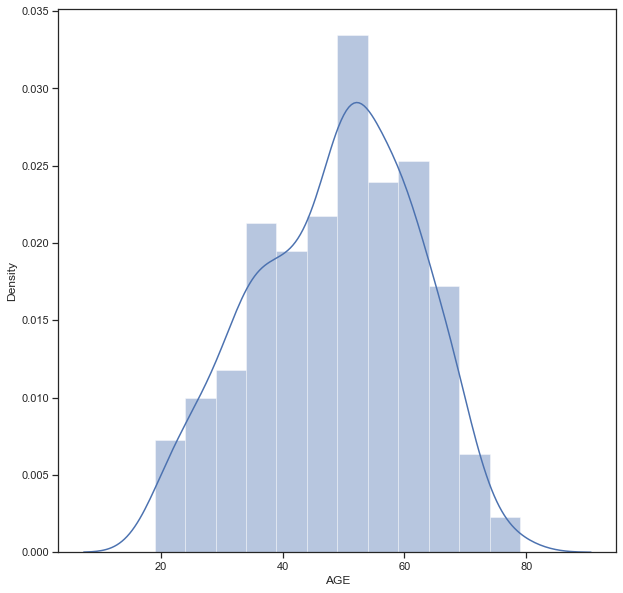

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['AGE'])

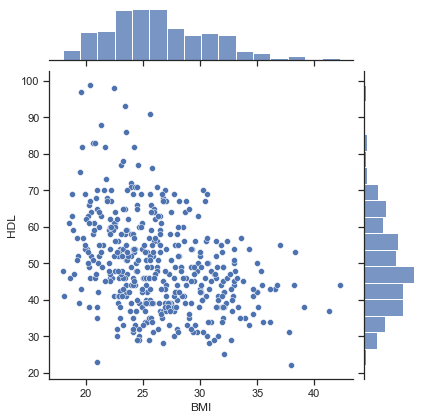

In [13]:
sns.jointplot(x='BMI', y='HDL', data=data)

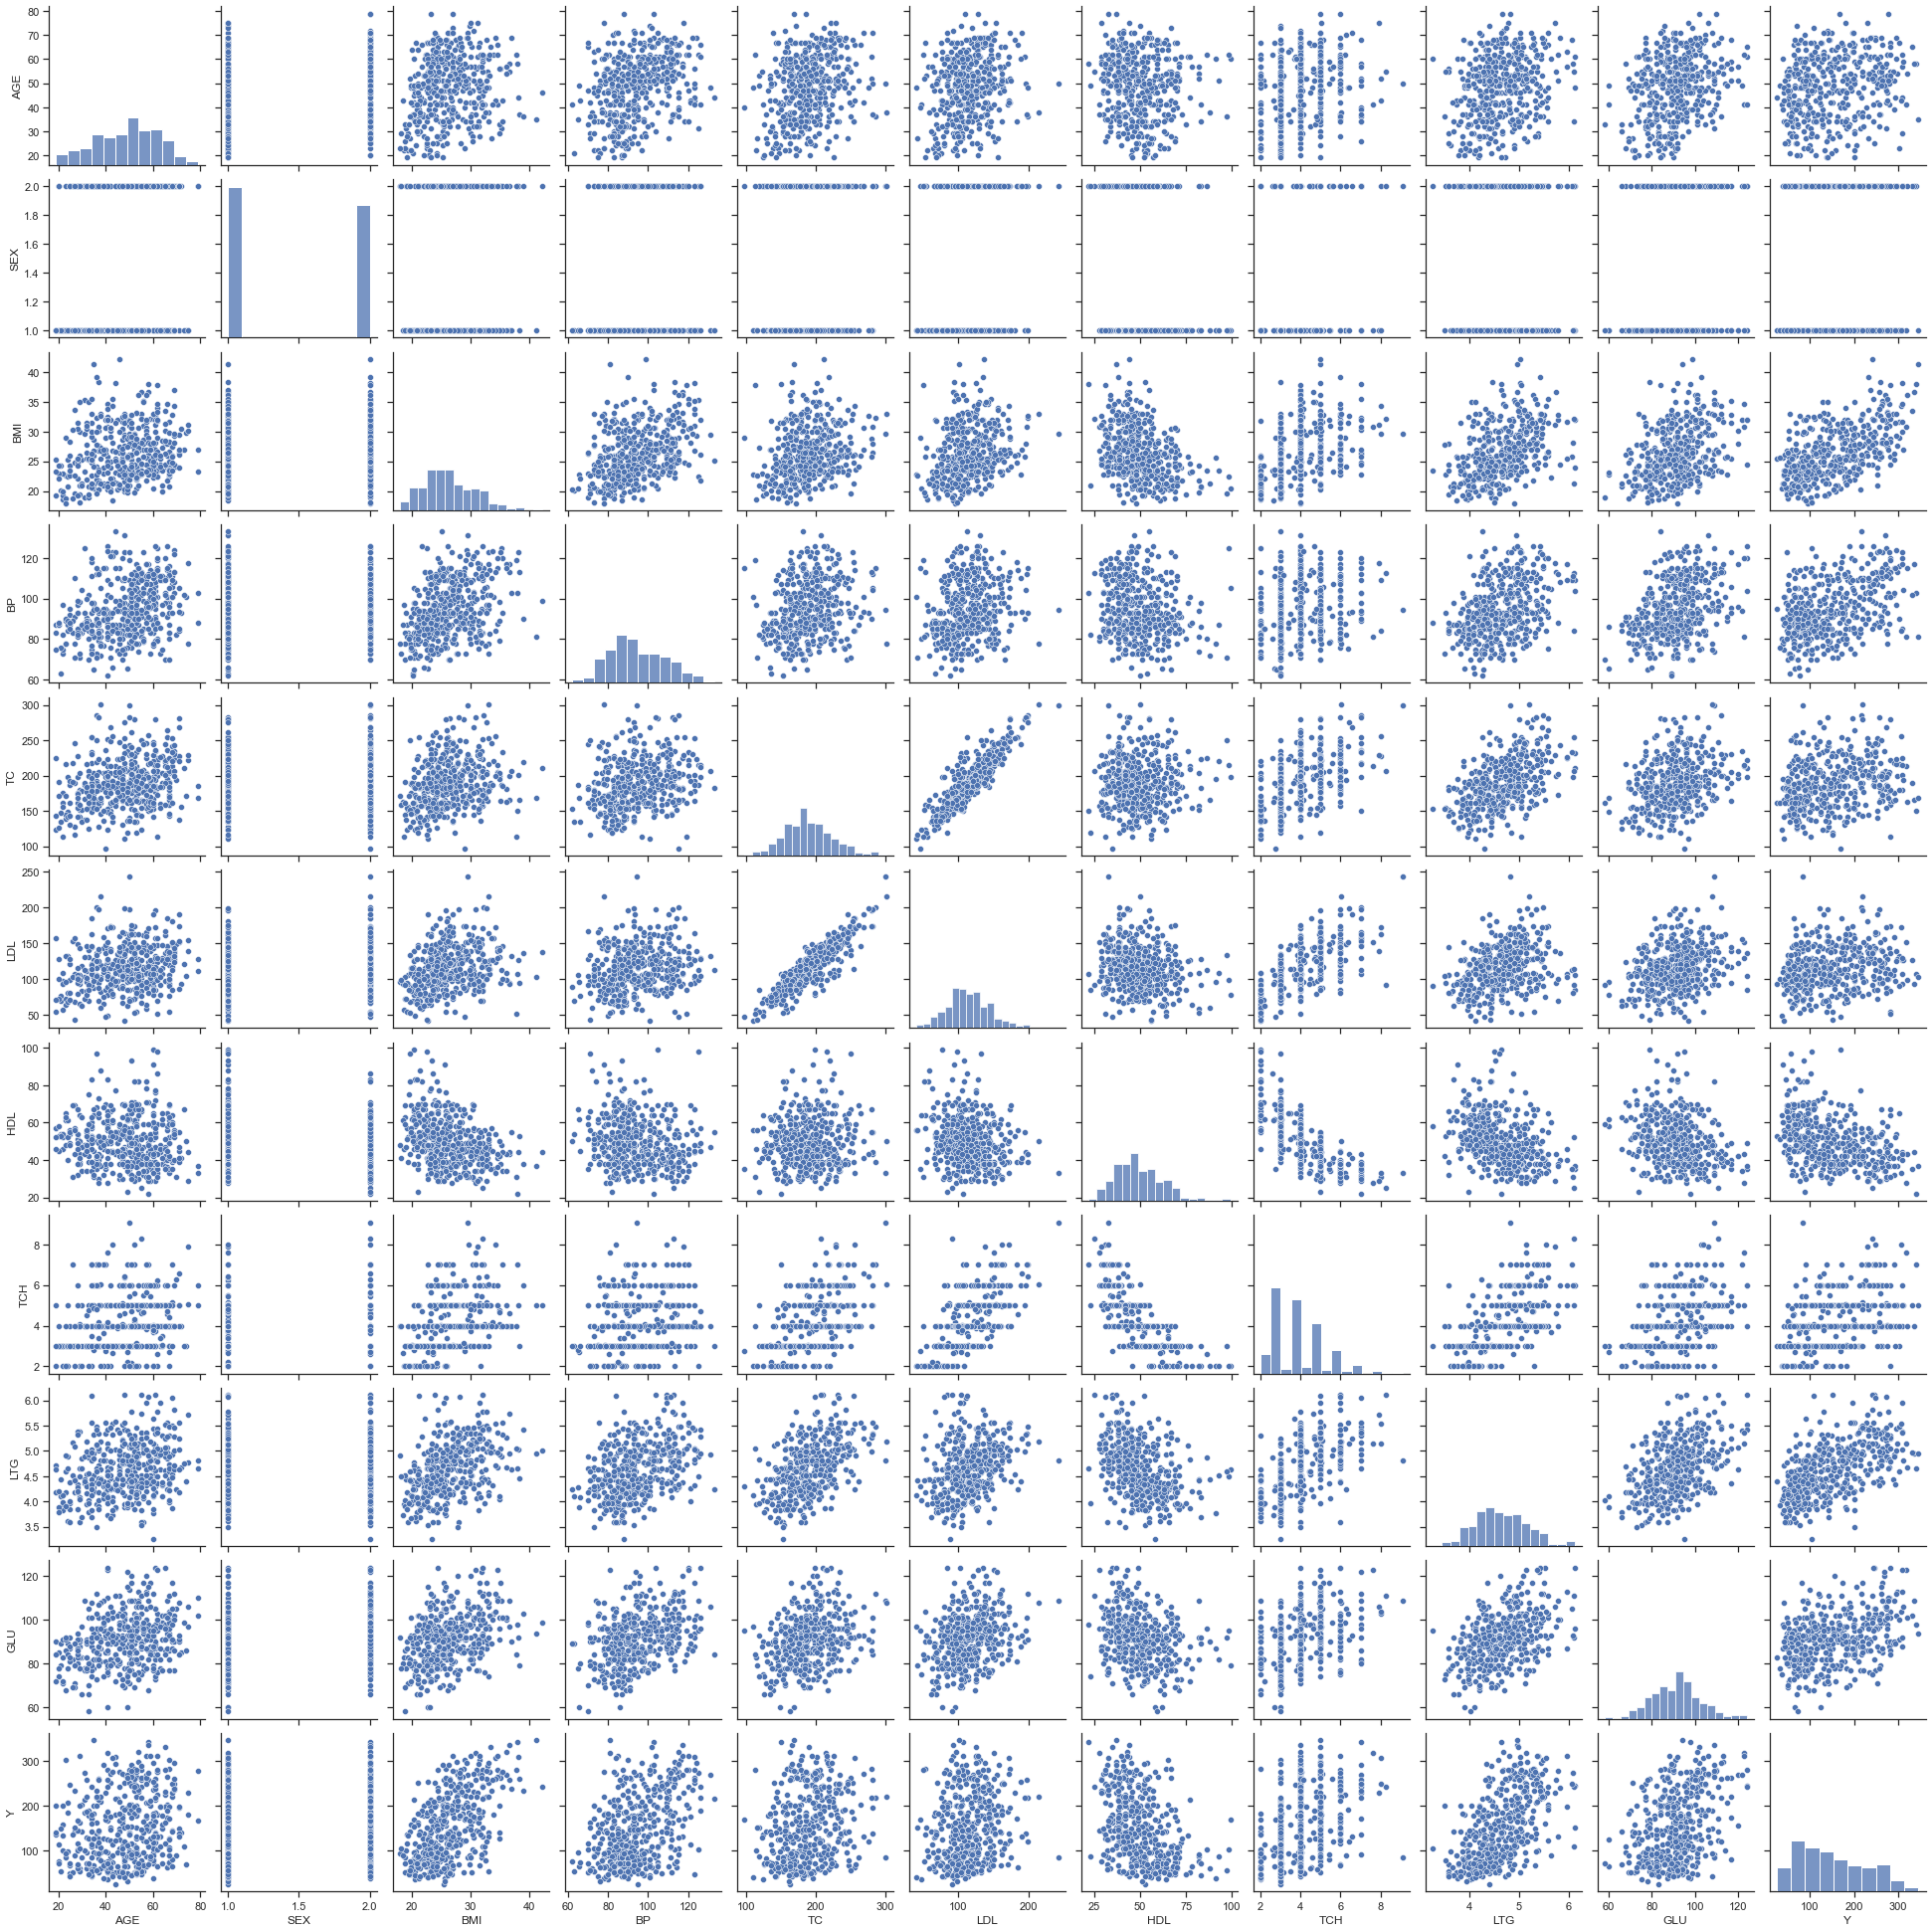

In [14]:
sns.pairplot(data)

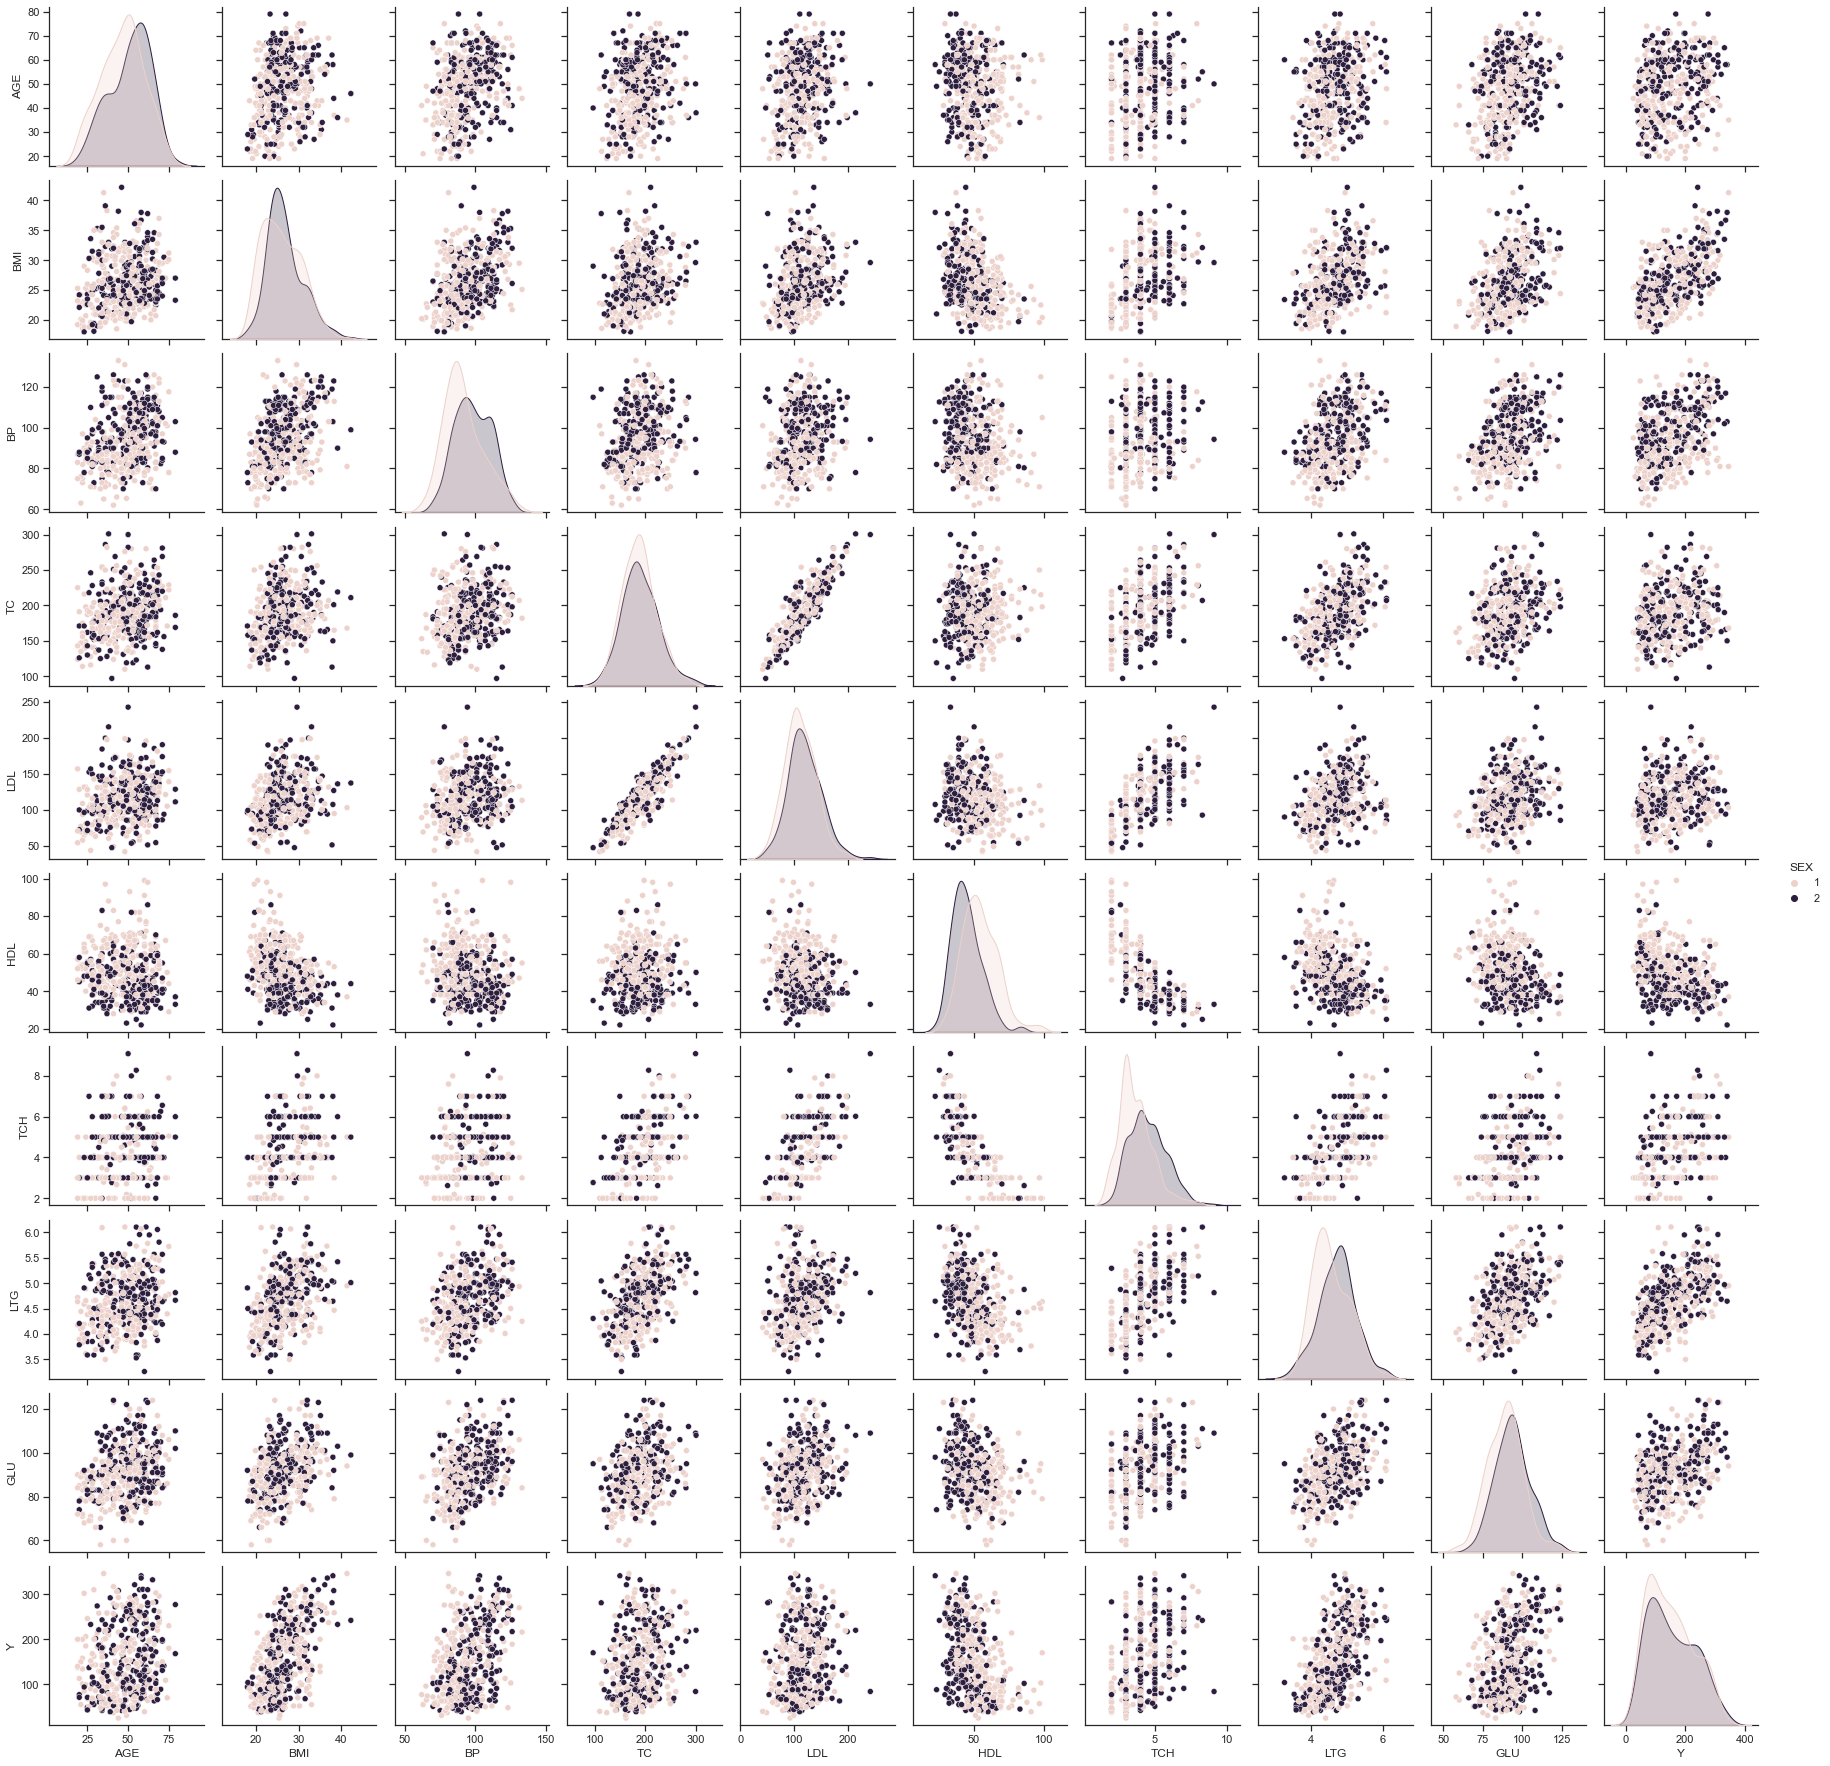

In [51]:
sns.pairplot(data, hue="SEX")

## Ящик с усами

Построим распределние параметра AGE сгруппированное по SEX

<AxesSubplot:xlabel='SEX', ylabel='AGE'>

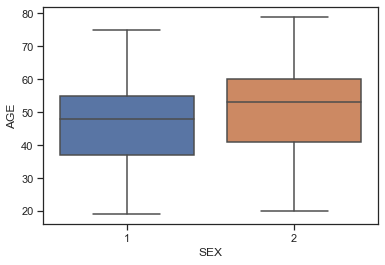

In [52]:
sns.boxplot(x='SEX', y='AGE', data=data)

## Violin plot

Аналогично диаграмме "ящик с усами" построим диаграмму "Violin plot"

C:\Users\Xiaomi\Desktop\Study\6 sem\ТМО\lab1\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

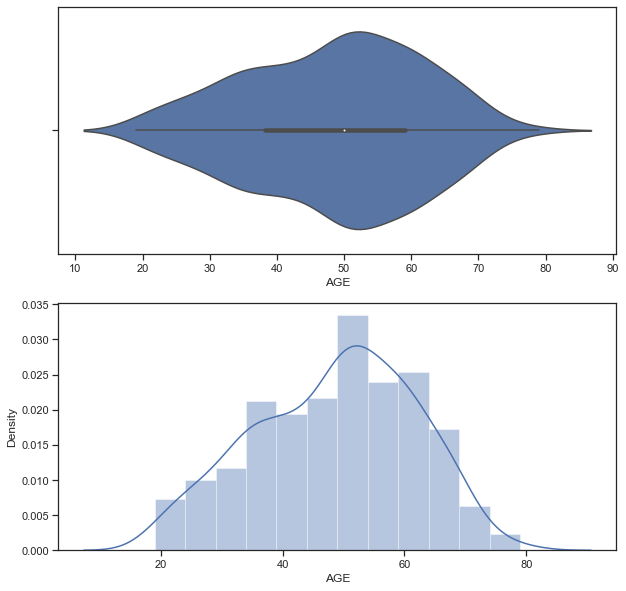

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x = data['AGE'])
sns.distplot(data['AGE'],ax=ax[1])

<AxesSubplot:xlabel='SEX', ylabel='AGE'>

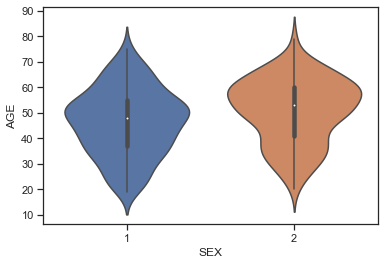

In [54]:
sns.violinplot(x = 'SEX', y = 'AGE', data = data)

# Исследование корреляции признаков

## Корреляционная матрица

По умолчанию используем коэффициент корреляции Пирсона

In [55]:
data.corr()

AGE       SEX       BMI        BP        TC       LDL       HDL  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
TC   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
LDL  0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
HDL -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
TCH  0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
LTG  0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
GLU  0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

          TCH       LTG       GLU         Y  
AGE  0.203841  0.270774  0.301731  0.187889  
SEX  0.332115  0.149916  0.208133  0.043062  
BMI  0.413807  0.446157  0.388680  0.586450  
BP   0.257650  0.393480  0.390430  0.441482  
TC   0.542207  0.515503  0.325717  0.212022  
LDL  0.659817  0.318357  0.290600  0.174054  
HDL -0.738493 -0.398577 -0.273697 -0.394789  
TCH  1.000000  0.617859  0.417212  0.430453  
LTG  0.617859  1.000000  0.464669  0.565883  
GLU  0.417212  0.464669  1.000000  0.382483  
Y    0.430453  0.565883  0.382483  1.000000

Для большей наглядности визуализируем корреляционную матрицу с помощью тепловой карты "heatmap"

<AxesSubplot:>

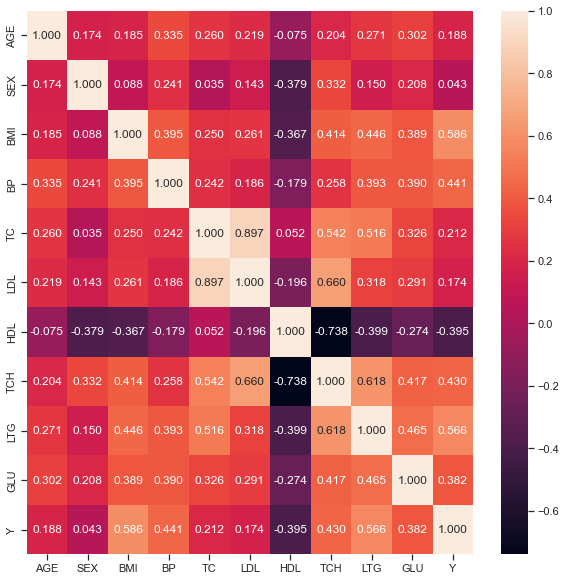

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), annot=True, fmt='.3f')

Постороим также тепловые карты разными методами

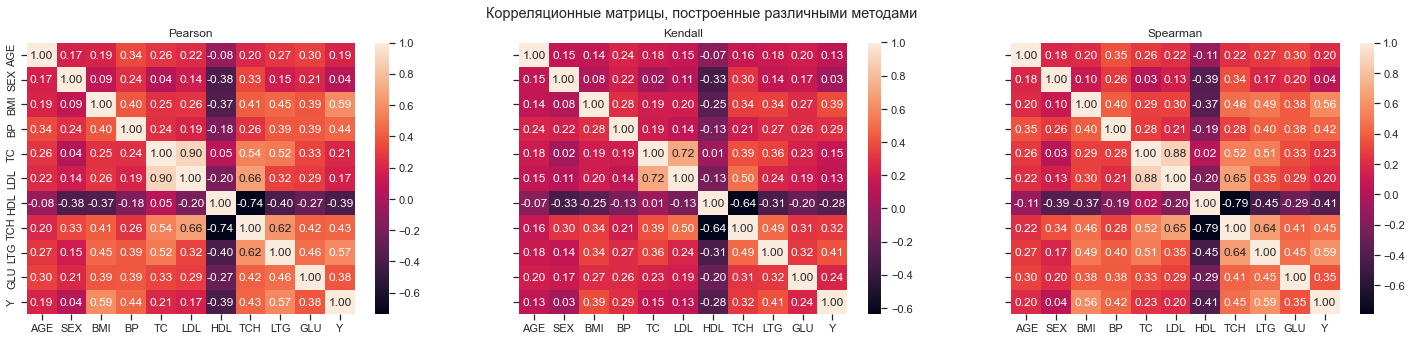

In [16]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(25,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')